# Dados coletados do experimento 

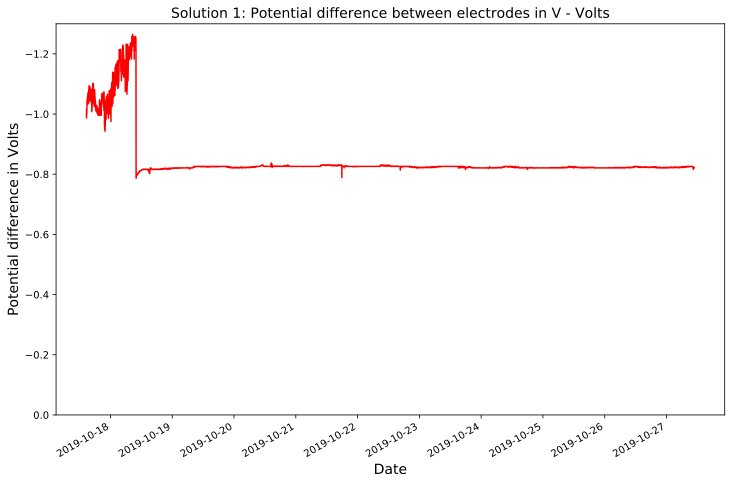

In [352]:
geraGrafico("Date", "Solution 1: Potential difference between electrodes in V - Volts",
            solucao1, 100, len(solucao1), 0.0, -1.3,
            minutos=1, cor='red')

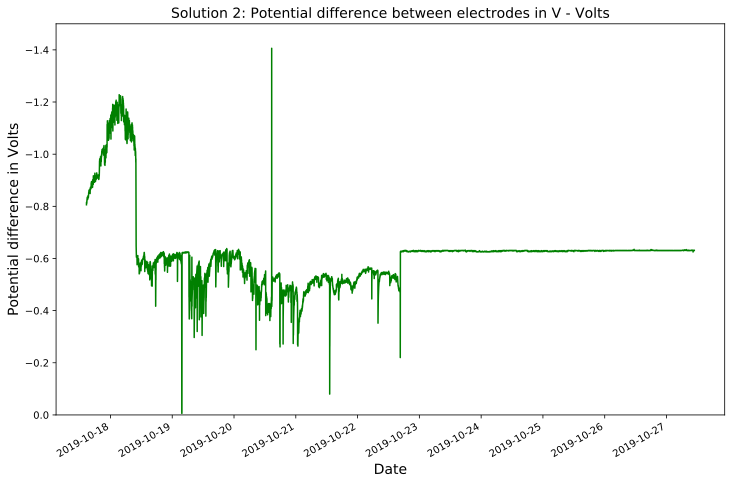

In [353]:
geraGrafico("Date", "Solution 2: Potential difference between electrodes in V - Volts",
            solucao2, 100, len(solucao2), 0.0, -1.5, 
            minutos=1, cor='green')

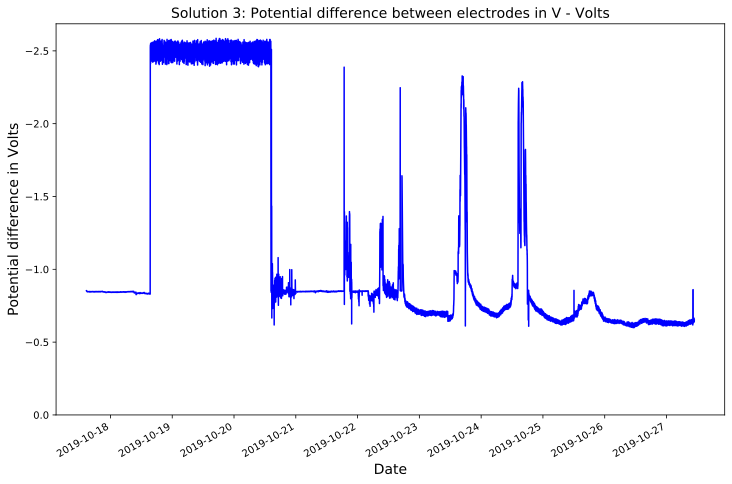

In [354]:
geraGrafico("Date", "Solution 3: Potential difference between electrodes in V - Volts",
            solucao3, 100, len(solucao3), 0.0, solucao3.min()-0.1, 
            minutos=1, cor='blue')

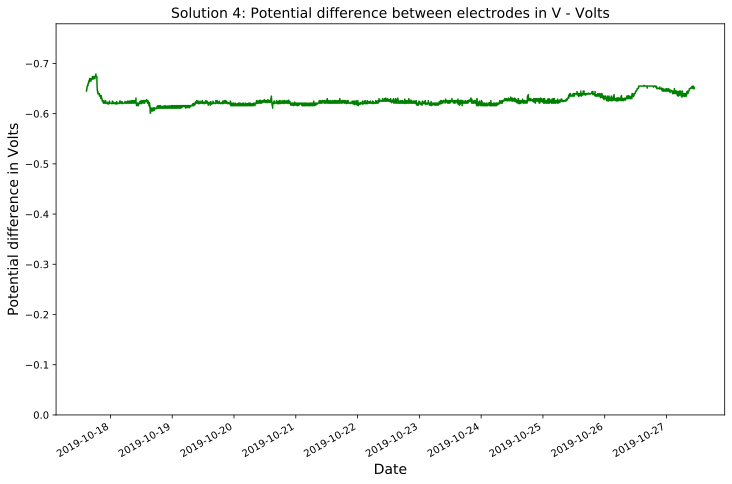

In [355]:
geraGrafico("Date", "Solution 4: Potential difference between electrodes in V - Volts",
            solucao4, 100, len(solucao4), 0.0, solucao4[100:].min()-0.1, minutos=1,
            cor='green')




# Programa

In [356]:
#Necessário para os gráficos

#DEBUG

%matplotlib inline
%config InlineBackend.figure_format='svg'

%config InlineBackend.rc={'figure.figsize': (12, 8)}

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [357]:
dados = pd.read_csv('DADOS.CSV', sep=',', header=None)

### Tratamento de dados, agregações e nova tabela

In [358]:
dados = dados.iloc[:, 0:10]

horas = []
for i in range(0, len(dados)):
    #Modelo: 2017-01-01 05:03 
    horas.append(("%d-%d-%d %d:%d:%d" %(dados[6][i], dados[5][i], 
                 dados[4][i], dados[7][i], dados[8][i], dados[9][i])))
    
dados = dados.iloc[:, 0:4]
horario = pd.to_datetime(horas)
dados = dados.join(pd.DataFrame(horario), how='outer', rsuffix=' ')
dados = dados.set_index('0 ')
dados.columns = ['Solucao 1', 'Solucao 2', 'Solucao 3', 'Solucao 4']
dados.index.name = 'Horario'

In [359]:
dados

,Solucao 1,Solucao 2,Solucao 3,Solucao 4
Horario,,,,
2019-10-17 13:01:50,-0.335,-0.535,-0.780,-0.767
2019-10-17 13:02:00,-0.338,-0.541,-0.791,-0.787
2019-10-17 13:03:00,-0.366,-0.549,-0.823,-0.824
2019-10-17 13:04:00,-0.479,-0.572,-0.833,-0.831
2019-10-17 13:05:00,-0.557,-0.648,-0.836,-0.836
...,...,...,...,...
2019-10-27 10:44:00,-0.823,-0.631,-0.645,-0.651
2019-10-27 10:45:00,-0.822,-0.631,-0.642,-0.651
2019-10-27 10:46:00,-0.823,-0.631,-0.648,-0.651


In [360]:
solucao1 = dados.iloc[:, 0]
solucao2 = dados.iloc[:, 1]
solucao3 = dados.iloc[:, 2]
solucao4 = dados.iloc[:, 3]

In [361]:
def geraGrafico(nomeX, titulo, solucao, dadosmin, dadosmax, 
                limY_inf=0, limY_sup=2.5, minutos=10, cor='red'):
    solucao = solucao.iloc[range(dadosmin, dadosmax, minutos)] 
    plt.title(titulo, fontsize=14)
    plt.xlabel(nomeX, fontsize=14)
    plt.ylabel("Potential difference in Volts", fontsize=14)
    
    plt.ylim(limY_inf, limY_sup)
    plt.gcf().autofmt_xdate()
    plt.plot(solucao, color=cor)